In [1]:
from pathlib import Path

In [22]:
labpy_dir = Path("/home/arash/Documents/Science/Research/Projects/LabPy")
data_dir = labpy_dir/"labbox_markdown/TF"

In [23]:
data_dir.exists()

True

In [29]:
func_markdown_list = list(data_dir.glob("*.md"))

In [61]:
func_stem_list = [md_file.stem for md_file in func_markdown_list]

In [30]:
# open each markdown and read the lines

func_dict = {}
for md_file in func_markdown_list:
    with md_file.open() as f:
        func_dict[md_file.stem] = f.readlines()

In [46]:
assert all([func_dict[md_file.stem][2:][0] == '## Function Calls\n' for md_file in func_markdown_list])

In [131]:
import re
directed_call_dict = {}
directed_edge_list = []
for md_file_stem in func_stem_list:
    call_list = []
    for i, line_ in enumerate(func_dict[md_file_stem][2:]):
        if i == 0:
            assert line_ == '## Function Calls\n'

        else:
            # extract expression between TF/ and .md
            match = re.search(r'\[(.*?)\]\((.*?)\.md\)', line_)
            if match:
                name1 = match.group(1)
                name2 = match.group(2)
                if name2 in func_stem_list:
                    call_list.append(name2)

    # remove self call
    call_list = [call for call in call_list if call != md_file_stem]
    # append self call
    call_list.append(md_file_stem)
    directed_edge_list.extend([(md_file_stem, call) for call in call_list])
    directed_call_dict[md_file_stem] = call_list

In [132]:
import pandas as pd
call_df = pd.DataFrame(directed_edge_list, columns=["caller", "called"])

In [133]:
import numpy as np
call_df.groupby("called").agg(len).sort_values("caller", ascending=True)

,caller
called,
CheckEegStates_OLD,1
ComodugramRank,1
CurSrcDns,1
DetectRipples,1
mtchdfast,1
...,...
mtcsglong,7
CCG,8
WhitenSignal,8


In [144]:
call_df.to_csv("function_calls.csv", index=False)

In [142]:
caller_df = call_df.groupby("caller").agg(len).sort_values("called", ascending=True)

In [141]:
caller_df[caller_df["called"] == 1].index

Index(['templatefilter', 'ButFilter', 'CCG', 'CurSrcDns', 'Filter0',
       'FiringRate', 'thetarun', 'WaveletSampling', 'circmean', 'ShufflePhase',
       'SmoothFiring', 'Smooth_JUST_A_COPY_OF_MATLAB_GENERIC?',
       'SplitIntoBursts', 'ThreshCross', 'HistFiring', 'IntersectRanges',
       'PowerModulation', 'ReturnMap', 'RunningFun', 'RunningHist',
       'LocalMinima', 'LocalMinimaN', 'MyHilbert', 'PhaseFromCycles',
       'PointCorrel', 'PointFFT', 'CatTrains', 'wave_bases', 'mtparam',
       'mtparam_pt'],
      dtype='object', name='caller')

In [102]:
import networkx as nx

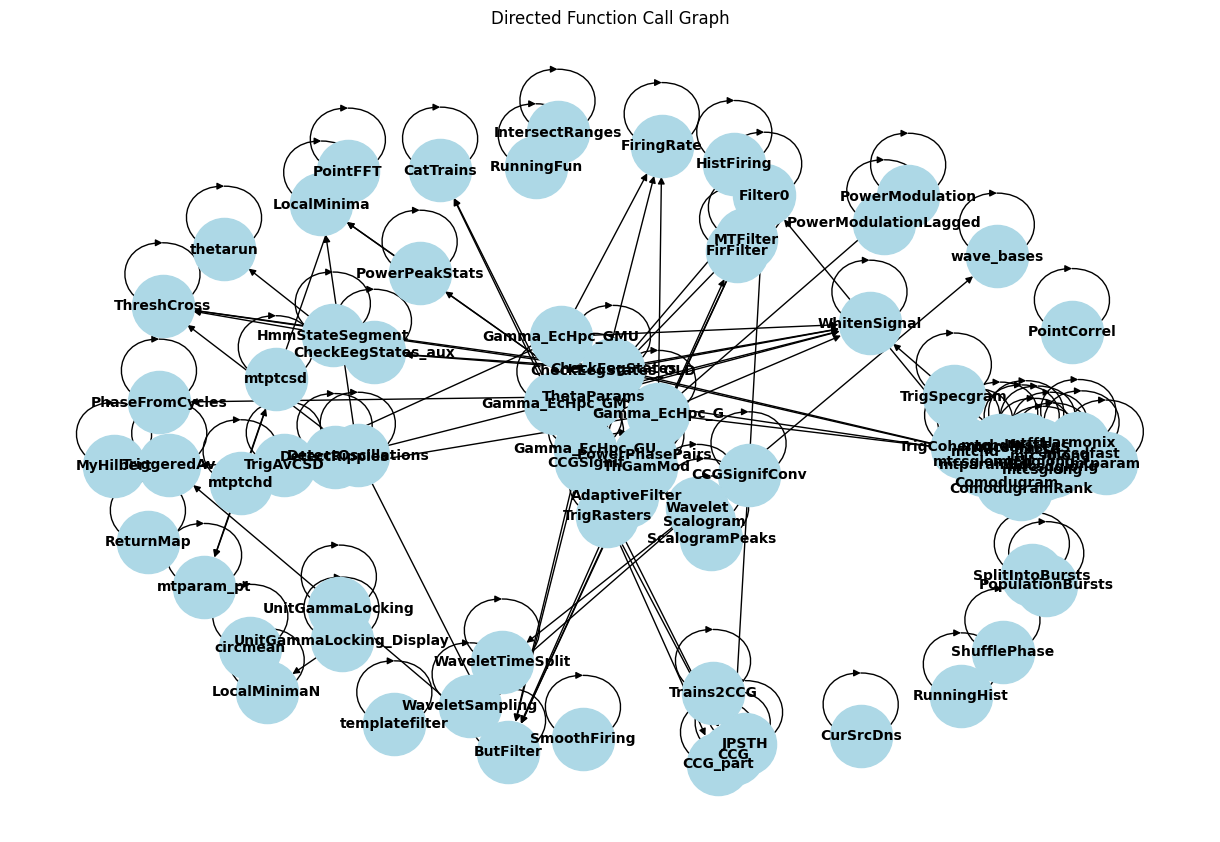

In [105]:
G = nx.DiGraph()
for src, dsts in directed_call_dict.items():
    for dst in dsts:
        G.add_edge(src, dst)

# visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Directed Function Call Graph")
plt.show()

In [100]:
directed_call_dict

{'UnitGammaLocking': ['UnitGammaLocking', 'TriggeredAv', 'ButFilter'],
 'SmoothFiring': ['SmoothFiring'],
 'Trains2CCG': ['CCG', 'Trains2CCG'],
 'ThetaParams': ['ButFilter',
  'LocalMinima',
  'AdaptiveFilter',
  'PowerPeakStats',
  'mtchglong',
  'MTFilter',
  'WhitenSignal',
  'ThetaParams',
  'PhaseFromCycles',
  'Filter0'],
 'mtchd': ['mtparam', 'mtcsd', 'mtchd'],
 'DetectOscillations': ['ThreshCross',
  'DetectOscillations',
  'LocalMinima',
  'ButFilter'],
 'HmmStateSegment': ['HmmStateSegment', 'ThreshCross', 'thetarun'],
 'ReturnMap': ['ReturnMap'],
 'Gamma_EcHpc_GM': ['mtptchd', 'WhitenSignal', 'Gamma_EcHpc_GM'],
 'Scalogram': ['Scalogram', 'Wavelet'],
 'templatefilter': ['templatefilter'],
 'MTFilter': ['MTFilter', 'Filter0'],
 'mtcsdfastAS': ['mtcsdfastAS', 'mtcsdfast', 'mtcsd'],
 'LocalMinima': ['LocalMinima'],
 'TriggeredAv': ['TriggeredAv', 'MyHilbert'],
 'WaveletSampling': ['WaveletSampling'],
 'wave_bases': ['wave_bases'],
 'mtparamEd': ['mtparam'],
 'SplitIntoBursts': 